# 1. Import libraries

In [1]:
# This are the libraries needed in this jupyter:
import numpy as np 
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

# 2. Import data.

In [2]:
data = pd.read_csv("../data/continent_smart.csv",encoding = "ISO-8859-1")

# 3. Display Configuration

In [3]:
# Matplotlib inline to visualize Matplotlib grahps:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

# 4. Graphs

## 4.1 Frequency of each country

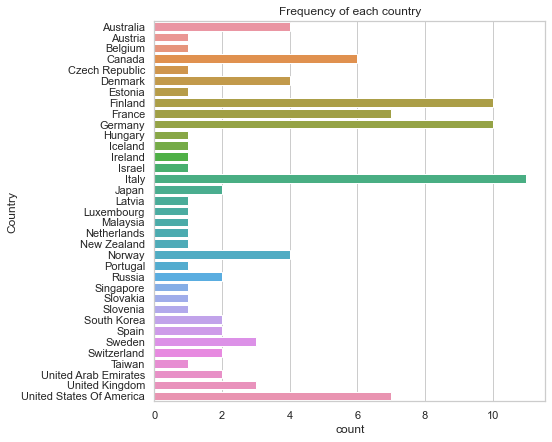

In [4]:
plt.figure(figsize=(7,7))
sns.countplot(y=data['Country'])
plt.title('Frequency of each country')
plt.show()

## 4.2 Frequency of each continent

In [5]:
data.Continent.unique()

array(['OC', 'EU', nan, 'AS'], dtype=object)

In [6]:
data.groupby(["Continent", "Country"])["Country"].count()


Continent  Country             
AS         Israel                   1
           Japan                    2
           Malaysia                 1
           Singapore                1
           South Korea              2
           Taiwan                   1
           United Arab Emirates     2
EU         Austria                  1
           Belgium                  1
           Czech Republic           1
           Denmark                  4
           Estonia                  1
           Finland                 10
           France                   7
           Germany                 10
           Hungary                  1
           Iceland                  1
           Ireland                  1
           Italy                   11
           Latvia                   1
           Luxembourg               1
           Netherlands              1
           Norway                   4
           Portugal                 1
           Russia                   2
           Slovaki

In [7]:
data.groupby(["Country", "City"])["City"].count()

Country                   City          
Australia                 Adelaide          1
                          Melbourne         1
                          Perth             1
                          Sydney            1
Austria                   Vienna            1
                                           ..
United States Of America  Los Angeles       1
                          New York          1
                          Philadelphia      1
                          San Francisco     1
                          Washington, DC    1
Name: City, Length: 99, dtype: int64

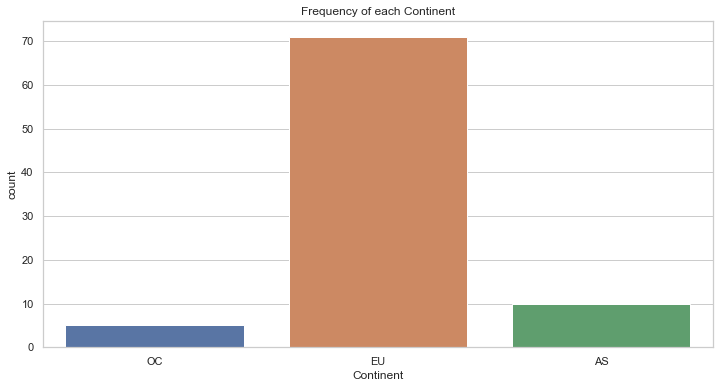

In [8]:
sns.countplot(x=data['Continent'])
plt.title('Frequency of each Continent')
plt.show()

## 4.3 Top 10 Cities in each category

In [9]:
def getTop10Cities(category,retunData=False):
    plt.figure(figsize=(7,7))
    top10 = data[['City',category]].sort_values(by=category, ascending=False).head(10)
    g=sns.barplot(data=top10,y='City',x=category)
    #Add (hue='Country') parameter to see which city belong to which country
    plt.title(f'Top 10 cities in {category}')
    plt.show()

    if retunData:
        return top10


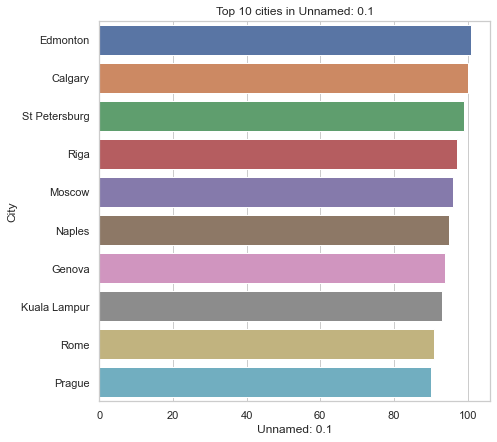

ValueError: The column label 'City' is not unique.

<Figure size 504x504 with 0 Axes>

In [10]:
for col in data.columns[2:]:
    getTop10Cities(col)
    print('\n')

In [ ]:
countries = data.groupby('Country')
country_names = data['Country'].unique()
columns = data.columns[2:]

In [ ]:
for country in country_names:
    plt.figure(figsize=(7,7))
    sns.barplot(x=countries.get_group(country)[columns].sum().values,y=columns)
    plt.title(f'Overall Data of {country} country')
    plt.show()